# Ising Model - 2D : Monte Carlo Simulation

First of all we import the required libraries:

In [17]:
import matplotlib.pyplot as plt
import math as math
import random as random
import pylab as pylab
import numpy as np
import seaborn as sns
sns.set()

### Global parameters

Then we set some global variables:

In [18]:
Kb = 1.0
JJ = 1.0

### Cold Start and Hot Start

Before begining simulation, if we select all spin up or all spin down then it is called cold configuration.

In [19]:
def cold_start(L):
    U = [[1.0 for k in range(L)]for l in range(L)]
    return U
    

We can make a plot of this cold configuration by the help of Uplotter :

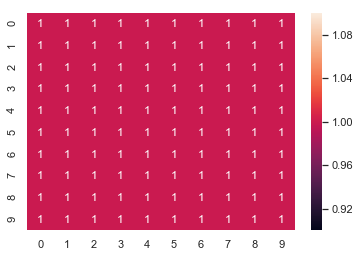

In [20]:
CU = cold_start(10)
sns.heatmap(CU,annot =True)

 if we select spin randomly up or down then it is called cold configuration

In [21]:
def hot_start(L): 
    U = [[0.0 for i in range(L)]for j in range(L)]
    for i in range(L):
          for j in range(L):
            t = random.sample([-1,1],1)
            U[i][j] = t[0]  
    return U 

Similarly we can plot thishot configuration as well.

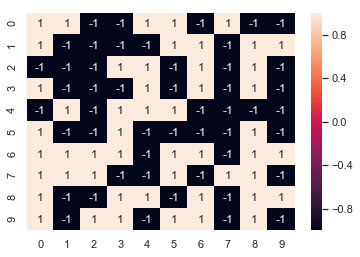

In [22]:
HU = hot_start(10)
sns.heatmap(HU,annot =True)

### Hamiltonian

Hamiltonian of  L by L lattice is given by

$H = - J \sum_{i\neq j} S_{i}S_{j}$

In [23]:
def Hamiltonian(U):
    H = 0.0
    L = len(U)
    for i in range(L):
        for j in range(L):
                
            ni = 0;nj =0;
            if i == 0: ni = L
            if j == 0: nj = L
           
            H = H -  0.5*JJ*U[i][j]*(U[i][(j-1)+nj] \
                        + U[(i+1)%L][j] \
                        + U[i][(j+1)%L] \
                        + U[(i-1)+ni][j])   
    return H

One can check what are hamiltonian for hot and cold start:

In [24]:
Hamiltonian(CU)

-200.0

In [25]:
Hamiltonian(HU)

20.0

### Mangnetization

One can calculate magnetization by simply taking average over all spins:

In [26]:
def magnetization(U):
    return np.array(U).sum()/float(len(U*len(U)))          

In [27]:
magnetization(HU)

0.02

In [28]:
magnetization(CU)

1.0

### Spin Flipper

In [29]:
def ld(k,L):
    if k == 0:
        return L
    else: return 0

In [30]:
def spin_flipper(U,printkey):
        L = len(U)
        
        i = random.randint(0, L-1) 
        j = random.randint(0, L-1)
       
        if printkey ==1:print("flipped at", i,j)
            
        U[i][j] = -U[i][j]
       
           
        dH =  -2.0*JJ*U[i][j]*(U[i][(j-1)+ld(j,L)] \
                            + U[(i+1)%L][j] \
                            + U[i][(j+1)%L] \
                            + U[(i-1)+ld(i,L)][j])      
        
        return U,dH,i,j 

### Thermalization

In [31]:
def Thermalization(U,T,nrun,printkey) :
        M = [0.0 for k in range(nrun)]
        irun = 0       
       
       
        while irun < nrun:
                    V = U
                    w = magnetization(U)
                    
                    U,dH,p,q = spin_flipper(U,printkey)
                   
                   
                    if dH < 0:
                        
                        if printkey ==1: print(irun, "E decreased! You are accepted !",dH)
                            
                        M[irun] = magnetization(U)
                       
                    else:
                        
                        if printkey ==1:print(irun, "E increased!",dH)
                            
                        frac = math.exp(-dH/(Kb*T))
                        b = random.uniform(0.0,1.0)
                            
                        if printkey ==1:print("frac =",frac,"b=",b,"dH = ",dH)
                                
                        if  b < frac:
                                    
                            if printkey ==1:print(irun, " You Lucky!")
                                
                            M[irun] = magnetization(U)
                             
                        else:
                            if printkey ==1: print(irun, "Loser!")
                            if printkey ==1: print("spin restablished at",p,q)
                            U[p][q] = -U[p][q]
                            M[irun] = w 
                           
                            
                    for i in range(L):
                        for j in range(L):
                            if U[i][j] != V[i][i]:
                                 if printkey ==1: print("Warning!spin is changed!", i,j) 
                            
                    
                    
                    
                    if printkey ==2 : print(irun, M[irun])   
                    irun = irun +1
        return M,U

Lets print out some measurements of m

In [32]:
nrun = 20
T = 1.0
L = 10
U = cold_start(L)  
M,U = Thermalization(U,T,nrun, 1)

flipped at 5 7
0 E increased! 8.0
frac = 0.00033546262790251185 b= 0.428460345383198 dH =  8.0
0 Loser!
spin restablished at 5 7
flipped at 2 8
1 E increased! 8.0
frac = 0.00033546262790251185 b= 0.08121981624191132 dH =  8.0
1 Loser!
spin restablished at 2 8
flipped at 3 8
2 E increased! 8.0
frac = 0.00033546262790251185 b= 0.12503769812547172 dH =  8.0
2 Loser!
spin restablished at 3 8
flipped at 7 2
3 E increased! 8.0
frac = 0.00033546262790251185 b= 0.586886424424385 dH =  8.0
3 Loser!
spin restablished at 7 2
flipped at 6 5
4 E increased! 8.0
frac = 0.00033546262790251185 b= 0.2579469651232691 dH =  8.0
4 Loser!
spin restablished at 6 5
flipped at 3 4
5 E increased! 8.0
frac = 0.00033546262790251185 b= 0.9916648362580026 dH =  8.0
5 Loser!
spin restablished at 3 4
flipped at 5 8
6 E increased! 8.0
frac = 0.00033546262790251185 b= 0.9745055754834461 dH =  8.0
6 Loser!
spin restablished at 5 8
flipped at 7 1
7 E increased! 8.0
frac = 0.00033546262790251185 b= 0.3057639439593284 dH =

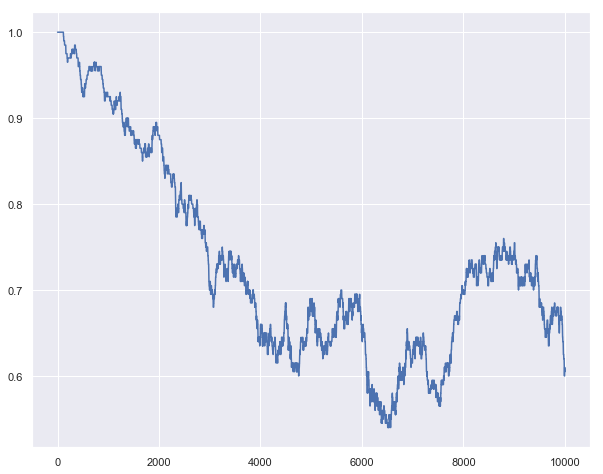

In [33]:
L = 20
nrun = 10000
T = 2.4
U = cold_start(L) 
M,U = Thermalization(U,T,nrun, 0)
X = np.arange(0,len(M),1)
plt.figure(figsize = [10,8])
plt.plot(X,M,"-")
plt.show() 

We can plot both run with hot and cold start together:

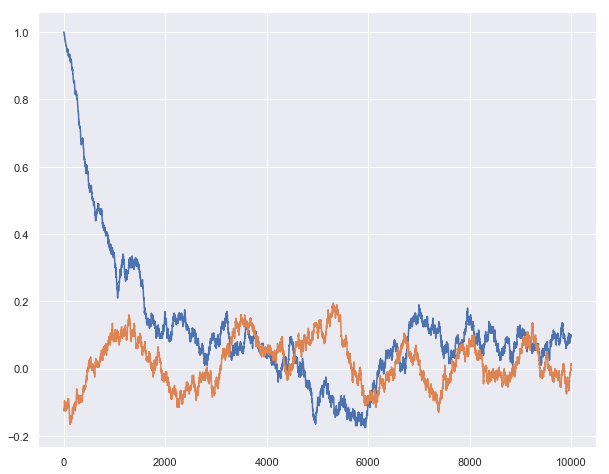

In [34]:
L =20
nrun = 10000
T = 5.0
U1 = cold_start(L) 
U2 = hot_start(L)
M1,U1 = Thermalization(U1,T,nrun,0)
M2,U2 = Thermalization(U2,T,nrun,0)
X = np.arange(0,len(M1),1)

plt.figure(figsize = [10,8])
plt.plot(X,M1,"-")
plt.plot(X,M2,"-")
plt.show()


### Phase Transition

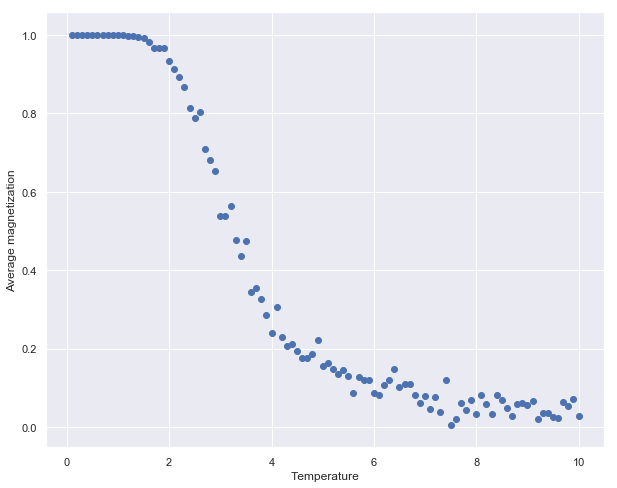

In [35]:
L = 32
nrun = 10000
Tn = 100
avm = []
KT = []

for t in range(1,Tn+1):
        T = 0.1*t
        KT.append(T)
        U = cold_start(L)
        M,U = Thermalization(U,T,nrun,0)
        nM = M[1000:nrun-1]
        avm.append(np.mean(nM))
       
 

plt.figure(figsize = [10,8])
plt.scatter(KT,avm)
plt.xlabel("Temperature")
plt.ylabel("Average magnetization")
plt.show() 